## Wrangling and analyzing twitter data

In [1]:
#import packages required for the entire analysis
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt


In [107]:
#reading csv file from twitter-arvhive-enhanced.csv to the dataframe df'
df=pd.read_csv('twitter-archive-enhanced.csv')

In [108]:
#printing first few lines of the datafram
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [109]:
#fetching image predictions data in the form of tsv file from the http address 
r=rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [110]:
#reading predictions file data into a data frame
df_predictions=pd.read_table(r.url,sep='\t')

In [112]:
#printin first few lines of the dataframe just loaded
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [113]:
#connecting to twitter api
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



In [13]:
api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [13]:
#fetching data from api for each tweet_id 
tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 94
Rate limit reached. Sleeping for: 111


In [14]:
import json

#dumping the read data into a csv file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [12]:
#reading the csv file into a datafram
df_tweet = pd.read_json('tweet_json.txt',orient='index')


In [114]:
#printing first few lines of the dataframe
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2562,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,517,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assessing data

After gathering data it needs to be assessed visually and programmically for any quality and tidiness issues.

### Twitter archive dataframe

In [14]:
#examining the struncture of the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Quality issues

* There are wrong names in the name column which might have happened while extracting the name of the dog from the tweet.
* There are records with retweet status id which are retweets and not the original ones which is irrelevant.
* There are unwanted columns which are not needed for analysis.

#### Tidiness issues

* Looking at the datatypes of the dataframe we can see that the id columns are interpreted as float and integer which should be actually object datatpe.
* Timestamp column is interpreted as object datatype which should be better if it is in date format.
* Dog stage does not need four different columns 



   

In [115]:
#making a copy of the original dataframe where the cleaned data will be stored
df_clean=df.copy()
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
#dropping records which have not null retweet status id which are the retweets
df_clean.drop(df_clean[df_clean['retweeted_status_id'].isnull()==False].index,inplace=True)


In [18]:
#examining the structure of the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [19]:
#renaming name column values which starts with lower case characters as 'none' because those are not actually names
df_clean.loc[df_clean['name'].str.islower(),'name'] = None



In [20]:
#printing first few lines after the cleaning process
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [116]:
#combining unnecessary columns into one column 
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_clean['stage'].replace("doggoNonepupperNone","None", inplace=True)
df_clean['stage'].replace("doggoNoneNonepuppo","None", inplace=True)
df_clean['stage'].replace("doggoflooferNoneNone","None", inplace=True)





In [118]:
#printing first few columns of the cleaned dataframe
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [119]:
#converting tweet_id column to string datatype
df_clean['tweet_id'] = df_clean.tweet_id.astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                         2

In [120]:
#converting timestamp column to datetime datatype
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'], format='%Y-%m-%d %H:%M')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                  

In [121]:
#dropping columns which are not necessary for analysis
df_clean.drop(['retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 110.5+ KB


In [123]:
#creating copy of the predictions dataframe where we will store the cleaned dataframe
df_predictions_clean=df_predictions.copy()

In [124]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [125]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality issues

* p1,p2 and p3 columns have _ between names.  
* The names are not consistent. Some names are capitalized and some are not.

#### Tidiness issues

* Looking at the datatypes of the dataframe we can see that the tweet_id column is interpreted as integer which should be actually object datatpe.


In [126]:
df_predictions_clean['p1_dog'].unique()

array([ True, False])

In [127]:
#replacing _ in between names in p1,p2 & p3 columns
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.replace('_', ' ')
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.replace('_', ' ')
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.replace('_', ' ')



In [128]:
#captializing the first letter of each word in the name columns
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.title()
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.title()
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.title()


In [129]:
#converting tweet_id column to string datatype
df_predictions_clean['tweet_id'] = df_predictions_clean.tweet_id.astype(str)

In [130]:
df_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


In [131]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null int64
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [132]:
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2562,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,517,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


#### Quality issues

* There are records with retweet status id which are retweets and not the original ones which is irrelevant.

#### Tidiness issues

* Looking at the datatypes of the dataframe we can see that the id column is interpreted as integer which should be actually object datatpe.

In [37]:
#making a copy of the original dataframe where we will store the cleaned data
df_tweet_clean=df_tweet.copy()



In [38]:
#replacing column name 'id' with 'tweet_id' so that the column name will be same across all three data frames
df_tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [39]:
#converting tweet_id datatype to string
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

In [40]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null int64
geo                              0 non-null float64
tweet_id                         2345 non-null object
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [41]:
#dropping records for which the retweet status id is not null that those records that are retweets
df_tweet_clean.drop(df_tweet_clean[df_tweet_clean['retweeted_status'].isnull()==False].index,inplace=True)

In [42]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
entities                         2175 non-null object
extended_entities                1749 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null int64
geo                              0 non-null float64
tweet_id                         2175 non-null object
id_str                           2175 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [43]:
#dropping unwanted columns from the dataframe that are not required for analysis
df_tweet_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)



In [133]:
df_tweet_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2562,666020888022790144,517,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,130,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,125,666033412701032448,44,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,299,666044226329800704,141,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,109,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...


In [135]:
#combining all three dataframes into one dataframe using inner join based on tweet_id

df_combined = pd.merge(df_clean, df_predictions_clean,on='tweet_id', how='inner')

df_combined = pd.merge(df_combined, df_tweet_clean,on='tweet_id', how='inner')




In [137]:
df_combined.head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
0,891815181378084864,2017-07-31 00:18:03,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25060,4195,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,2017-07-30 15:58:51,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42210,8715,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,40359,9485,This is Franklin. He would like you to stop ca...
3,891087950875897856,2017-07-29 00:08:17,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20241,3136,Here we have a majestic great white breaching ...
4,890729181411237888,2017-07-28 00:22:40,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,65607,19058,When you watch your owner call another dog a g...


### Storing, Analyzing, and Visualizing Data

In [138]:
#storing the combined dataframe into a csv file
df_combined.to_csv('twitter_archive_master.csv')


In [139]:
#reading the csv file into a dataframe
df_twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

In [140]:
df_twitter_archive_master

,Unnamed: 0,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
0,0,891815181378084864,2017-07-31 00:18:03,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,25060,4195,This is Archie. He is a rare Norwegian Pouncin...
1,1,891689557279858688,2017-07-30 15:58:51,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42210,8715,This is Darla. She commenced a snooze mid meal...
2,2,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,40359,9485,This is Franklin. He would like you to stop ca...
3,3,891087950875897856,2017-07-29 00:08:17,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20241,3136,Here we have a majestic great white breaching ...
4,4,890729181411237888,2017-07-28 00:22:40,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,...,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,65607,19058,When you watch your owner call another dog a g...
5,5,890609185150312448,2017-07-27 16:25:51,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,...,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,27790,4301,This is Zoey. She doesn't want to be one of th...
6,6,890006608113172480,2017-07-26 00:31:25,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,...,True,Pomeranian,0.013884,True,Chow,0.008167,True,30678,7399,This is Koda. He is a South Australian decksha...
7,7,889638837579907072,2017-07-25 00:10:02,12,10,Ted,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French Bulldog,...,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True,27196,4583,This is Ted. He does his best. Sometimes that'...
8,8,889278841981685760,2017-07-24 00:19:32,13,10,Oliver,None,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,Whippet,...,True,Borzoi,0.194742,True,Saluki,0.027351,True,25323,5477,This is Oliver. You're witnessing one of his m...
9,9,888917238123831296,2017-07-23 00:22:39,12,10,Jim,None,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,Golden Retriever,...,True,Tibetan Mastiff,0.120184,True,Labrador Retriever,0.105506,True,29109,4532,This is Jim. He found a fren. Taught him how t...


In [141]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 21 columns):
Unnamed: 0            1300 non-null int64
tweet_id              1300 non-null int64
timestamp             1300 non-null object
rating_numerator      1300 non-null int64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object


In [142]:
#dropping unwanter junk column
df_twitter_archive_master.drop(['Unnamed: 0'],axis=1,inplace=True)

In [143]:
#converting tweet_id datatype to string
df_twitter_archive_master.tweet_id = df_twitter_archive_master.tweet_id.astype(str)

In [144]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 20 columns):
tweet_id              1300 non-null object
timestamp             1300 non-null object
rating_numerator      1300 non-null int64
rating_denominator    1300 non-null int64
name                  1300 non-null object
stage                 1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
dtypes: bool(3), float64(3), int64(5), ob

In [146]:
#compute descriptive statistics for all the available columns
df_twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03,1300.000000,1300.000000
mean,12.843077,10.545385,1.186923,0.587045,1.371542e-01,6.144363e-02,8308.376923,2535.446154
std,51.127955,7.871481,0.540562,0.273533,1.018995e-01,5.200750e-02,11476.353890,4054.812256
min,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,79.000000,13.000000
25%,10.000000,10.000000,1.000000,0.354718,5.440723e-02,1.649338e-02,1721.250000,584.750000
50%,11.000000,10.000000,1.000000,0.579762,1.203825e-01,4.961540e-02,3847.000000,1269.500000
75%,12.000000,10.000000,1.000000,0.836836,1.987905e-01,9.470035e-02,10291.250000,3002.500000
max,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.710420e-01,123104.000000,61183.000000


### Which image is least rated one?

In [147]:

df_twitter_archive_master[df_twitter_archive_master['rating_numerator']==1]



,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
966,675153376133427200,2015-12-11 03:21:23,1,10,None,None,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False,6617,2808,What kind of person sends in a picture without...
1235,667549055577362432,2015-11-20 03:44:31,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False,5984,2395,Never seen dog like this. Breathes heavy. Tilt...
1287,666287406224695296,2015-11-16 16:11:11,1,2,an,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True,149,68,This is an Albanian 3 1/2 legged Episcopalian...
1290,666104133288665088,2015-11-16 04:02:55,1,10,None,None,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False,14406,6662,Not familiar with this breed. No tail (weird)....


In [148]:
df_twitter_archive_master[(df_twitter_archive_master['tweet_id']=='666287406224695296') & (df_twitter_archive_master['favorite_count']==149)].jpg_url

1287    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
Name: jpg_url, dtype: object

Above jpg link shows the dog that is rated very low.

### Which image is most rated one?

In [149]:
df_twitter_archive_master[df_twitter_archive_master['rating_numerator']==1776]

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
452,749981277374128128,2016-07-04 15:00:45,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,5513,2712,This is Atticus. He's quite simply America af....


In [150]:
df_twitter_archive_master[df_twitter_archive_master['tweet_id']=='749981277374128128'].jpg_url

452    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

Above image shows the most rated dog image. 

What are the most recent 5 tweets?

In [151]:
    df_twitter_archive_master.sort_values(by=['timestamp'],ascending=False).head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
0,891815181378084864,2017-07-31 00:18:03,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25060,4195,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,2017-07-30 15:58:51,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42210,8715,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,40359,9485,This is Franklin. He would like you to stop ca...
3,891087950875897856,2017-07-29 00:08:17,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20241,3136,Here we have a majestic great white breaching ...
4,890729181411237888,2017-07-28 00:22:40,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,65607,19058,When you watch your owner call another dog a g...


Above results show the most recent five tweets.

What are the top most favourite tweets?


In [152]:
df_twitter_archive_master.sort_values(by=['favorite_count'],ascending=False).head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
232,807106840509214720,2016-12-09 06:17:20,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,123104,61183,This is Stephan. He just wants to help. 13/10 ...
190,819004803107983360,2017-01-11 02:15:36,14,10,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,0.351308,True,Toy Poodle,0.271929,True,Tibetan Terrier,0.094759,True,93766,41055,This is Bo. He was a very good First Doggo. 14...
85,859196978902773760,2017-05-02 00:04:57,12,10,quite,None,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False,Malamute,0.216163,True,Persian Cat,0.128383,False,92526,31758,We only rate dogs. This is quite clearly a smo...
61,870374049280663552,2017-06-01 20:18:38,13,10,Zoey,None,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden Retriever,0.841001,True,Great Pyrenees,0.099278,True,Labrador Retriever,0.032621,True,83473,26896,This is Zoey. She really likes the planet. Wou...
42,877736472329191424,2017-06-22 03:54:17,13,10,Aja,None,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,Chesapeake Bay Retriever,0.837956,True,Labrador Retriever,0.062034,True,Weimaraner,0.040599,True,80063,19411,This is Aja. She was just told she's a good do...


The above results show the most favorite tweets.

### Which are the dogs that are most favorited ones?

In [154]:
df_twitter_archive_master.groupby(['p1']).mean()['favorite_count'].sort_values(ascending=False).head(5)



p1
Angora       46553.0
Limousine    46286.0
Conch        45936.0
Bubble       40325.0
Beaver       38211.0
Name: favorite_count, dtype: float64

Above results show the dogs which are most favorited.

### Which are the dogs that are having most retweet counts?


In [62]:
df_twitter_archive_master.groupby(['p1']).mean()['retweet_count'].sort_values(ascending=False).head(5)

p1
Conch      19405.0
Upright    18488.0
Bubble     17022.0
Gondola    16289.0
Angora     16030.0
Name: retweet_count, dtype: float64

The above results show dogs that have most retweet counts.

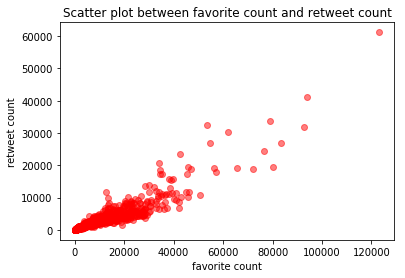

In [155]:
# scatter plot showing relationship between favorite count and retweet count
plt.scatter(x=df_twitter_archive_master['favorite_count'],y=df_twitter_archive_master['retweet_count'],c='red',alpha=.5)
plt.title('Scatter plot between favorite count and retweet count')
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.show()

From the above plot we can see that the favorite count and retweet count has a positive correlation between them.

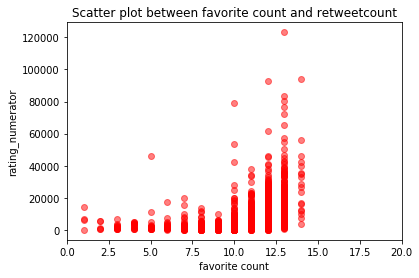

In [103]:
#scatter plot showing relationship between favorite count and rating numberator
plt.scatter(x=df_twitter_archive_master['rating_numerator'],y=df_twitter_archive_master['favorite_count'],c='red',alpha=.5)
plt.title('Scatter plot between favorite count and rating numberator')
plt.xlim(0,20)
plt.xlabel('favorite count')
plt.ylabel('rating_numerator')
plt.show()

From the above plot we can see that the tweets with higher favorite count are associated with higher rating.

## References

https://stackoverflow.com/questions/21608228/conditional-replace-pandas

http://www.datasciencemadesimple.com/check-lower-cases-column-dataframe-python/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html

https://stackoverflow.com/questions/39141856/capitalize-first-letter-of-each-word-in-the-column-python

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html